## Сборный проект 1 модуля

### Введение 

Анализ выполняется для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные за 2016 год о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Требуется выявить определяющие успешность игры закономерности и определить потенциально наиболее популярный продукт и спланировать рекламные кампании на 2017 год.

В данных доступна аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [85]:
# Импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy import stats as st

### Загрузка данных (Шаг 1)

 Данные представлены в одном наборе. Загрузим его, выведем на экран и посмотрим информацию.

In [86]:
data = pd.read_csv('/Users/peterefimov/Dropbox/DS_projects/4. I module final project./games.csv')
# data_calls = pd.read_csv('/datasets/games.csv')

display(data.head(10))
print()
print(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Данные загружены. Нам доступны название игры, платформа, год издания, продажи в миллионах долларов по Северной Америке, Европе, Японии и в прочих регионах, оценка критиков, оценка пользователей и возрастной рейтинг. Данные представлены в либо в виде строк, либо в виде вещественных чисел. В данных много пропусков, особенно в рейтингах. Приступаем к подготовке данных к анализу.

### Подготовка данных (Шаг 2)

#### Изменение регистра столбцов

Приведём названия столбцов к нижнему регистру.

In [87]:
data.columns = data.columns.str.lower()

#### Обработка дубликатов и пропусков

Проверим данные на наличие полных дубликатов.



In [88]:
print(f'Всего полных дубликатов: {data.duplicated().sum()}')

Всего полных дубликатов: 0


Проверим, есть ли дубликаты внутри строк, вызванные разным регистром.

In [89]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [90]:
print(len(data['name'].unique()))
# data['name'] = data['name'].str.lower()
# print(len(data['name'].unique()))
# Последние две строки комментирую, чтобы сохранить начальный вид записи. 
# Количество уникальных имён не изменилось

11560


Однако видно, что уникальных значений меньше, чем количество строк. Предположим, что это не дубликаты, а одна игра выходила в разное время и на разных полатформах. Проверим.

In [91]:
# Найдём номера строк, где могут быть дубликаты в названии:
display(data['name'].duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
16710     True
16711    False
16712    False
16713     True
16714     True
Name: name, Length: 16715, dtype: bool

In [92]:
# Выясним названия игр
data['name'].loc[[16710,16713,16714]]

16710    Samurai Warriors: Sanada Maru
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, dtype: object

In [93]:
display(data.query('name == "Samurai Warriors: Sanada Maru" '))
display(data.query('name == "Spirits & Spells" '))
display(data.query('name == "Winning Post 8 2016" '))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14689,Samurai Warriors: Sanada Maru,PS4,2016.0,Action,0.0,0.0,0.03,0.0,NaN,NaN,NaN
16323,Samurai Warriors: Sanada Maru,PSV,2016.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15771,Spirits & Spells,GC,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15599,Winning Post 8 2016,PS4,2016.0,Simulation,0.0,0.0,0.02,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.0,0.0,0.01,0.0,NaN,NaN,NaN


Предположение подтвердилось - одна и та же игра могла выходить на разных платформах. Таким образом, считаем, что дубликатов не обнаружено.

Проработаем пропуски в данных. В первую очередь обратим внимание на 2 пропущенных значения названия и жанре игры. 2 строки на фоне 16 тысяч ничтожно малы, можем их удалить. Тем более, эти строки не дадут актуальной для анализа информации. Скорее всего, причина этих пропусков кроется в какой-то локальной ошибке. Учитывая малочисленность этой ошибки, не считаю её значимой. 

Также считаю возможным удалить строки с пропусками в годе выпуска игры. Их менее 2% от датасета, тем более у дальнейших расчётов идёт ощутимая привязка к году выпуска, и эти данные и так были бы скорее всего потеряны.

In [94]:
data.dropna(subset = ['name', 'genre', 'year_of_release'], inplace = True)

Рассмотрим пропуски в столбце года издания. Проверим, нет ли каких-либо странных значений кроме пропусков.

Обратим внимание на пропуски в рейтингах критиков, пользователей и возрастном. Во всех случаях пропущена почти половина данных. Считаю, что если заменять пропуски на некоторую расчётную величину, можно заметно повлиять на результат анализа. К тому же не столь очевидно, на что опираться при попытке подобного расчёта. Считаю, что стоит оставить эти пропуски без изменения - они не будут влиять на анализ конкретных параметров.

Пропуски носят системный характер и вряд ли единственная причина их появления - ошибка при сборе данных. Вероятно, сбор рейтингов проводился с ресурсов, не обозревающих некоторые игры в принципе и не учитывающих пользовательский рейтинг для определённых игры в принципе. Либо же дело в низкой популярности определённых игр и следующей из этого невозможности составить релевантный рейтинг. В любом случае, это тема для обсуждения с составителями данных.

Теперь рассмотрим возможные значения tbd (to be determined) в столбцах с рейтингами. Определим, где они есть.

In [95]:
print('tbd in critic_score')
print(len(data.query('critic_score == "tbd" ')))
print()
print('tbd in user_score')
print(len(data.query('user_score == "tbd" ')))
print()
print('tbd in rating')
print(len(data.query('rating == "tbd" ')))

tbd in critic_score
0

tbd in user_score
2376

tbd in rating
0


Можно предположить, что значение tbd, что переводится как "будет определено", относится к играм, недавно подготовленным к релизу. У таких игр уже может быть определён рейтинг критиков и возрастная группа. Возможно, данные по пользователям ещё не были собраны. Проверим.

In [96]:
display(data.query('user_score == "tbd" ').head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


Предположение не подтвердилось - подобные значения возникают и в достаточно старых играх. Так как эти значения по сути также являются пропусками, считаю возможным заменить их на настоящие пропуски. Таким образом, мы сохраняем в строки с пропусками в значении рейтинга и не снижаем актуальность анализа конкретно этого параметра. Причину их появления считаю идентичной обычным пропускам nan.

In [97]:
# Заменим значение tbd на np.nan - пропуск
data.loc[:,'user_score'].replace('tbd', np.nan, inplace=True)

#### Результат обработки пропусков

Данные проверены на полные и скрытые дубликаты. Удалены строки с пропущенным названием, жанром и годом выпуска игры, оставлены пропуски в значениях рейтинга. Избавились от странного значения tbd. Таким образом, мы сохранили прочие параметры и не исказили будущий результат анализа.

#### Преобразование данных

Считаю, что стоит преобразовать тип данных в столбце с годом выпуска со строкового на целое число (нет смысла переводить в формат даты, т.к. нам нужна одна цифра - только год), а столбец с рейтингом пользователей из строки в вещественное число. Переводить данные о продажах в целые числа не считаю необходимым, т.к. представление продаж в виде миллионов долларов считаю достаточно наглядным, а размеры датасета не столь значительные, чтобы значительно загружать мощность.

In [98]:
# Переведём данные о годе выпуске в целое число
data['year_of_release'].fillna(0,inplace=True)
data.loc[:,'year_of_release'] = data.loc[:,'year_of_release'].astype('int')
display(data.head(3))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [99]:
# Рейтинг пользователей в вещественное число
data['user_score'] = pd.to_numeric(data['user_score'])
# Проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Типы данных заменены успешно там, где это требуется.

#### Суммарные продажи во всех регионах

Добавим в данные столбец, отражающий сумму продаж во всех регионах.

In [100]:
data['sales_total'] = (data['na_sales'] + 
                       data['eu_sales'] + 
                       data['jp_sales'] + 
                       data['other_sales'])
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


### Вывод по подготовке данных

Данные загружены и визуально изучены, названия столбцов приведены к нижнему регистру, пропуски и дубликаты изучены и обработаны, типы данных приведены, дополнительный столбец посчитан.

### Исследовательский анализ данных (Шаг 3)

Определим распределение игр по годам.

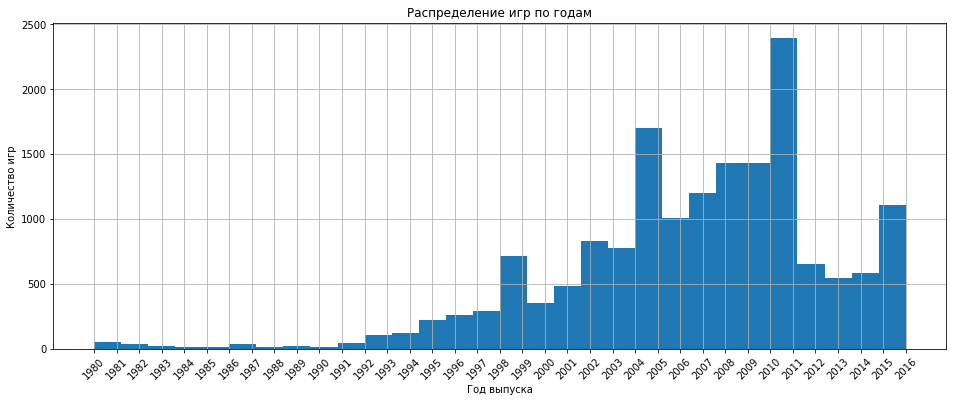

In [101]:
data['year_of_release'].hist(figsize=(16,6),bins=30,xrot=45)
plt.title('Распределение игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(np.linspace(1980,2016,37))
plt.show()

Заметен рост количества выпускаемых игр в год начиная примерно с 1992 года. Вряд ли данные о продаже игр до 1992 года будут как-либо значимы при составлении маркетинговой компании на 2017 год.

Определим наиболее популярные платформы.

In [102]:
# Составляю список 10 названий наиболее продаваемых платформ
top_platforms_list = (data
                      .pivot_table(index='platform', values='sales_total',aggfunc=sum)
                      .sort_values(by='sales_total', ascending=False)
                      .head(10).index.values)

print(f' Список наиболее популярных платформ: {top_platforms_list}')

# Собираю таблицу, включающую данные только по 10 самым продаваемым платформам
top_platforms = data.query('platform in @top_platforms_list')
top_platforms.head(3)

 Список наиболее популярных платформ: ['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'PS4' 'GBA' 'PSP' '3DS']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77


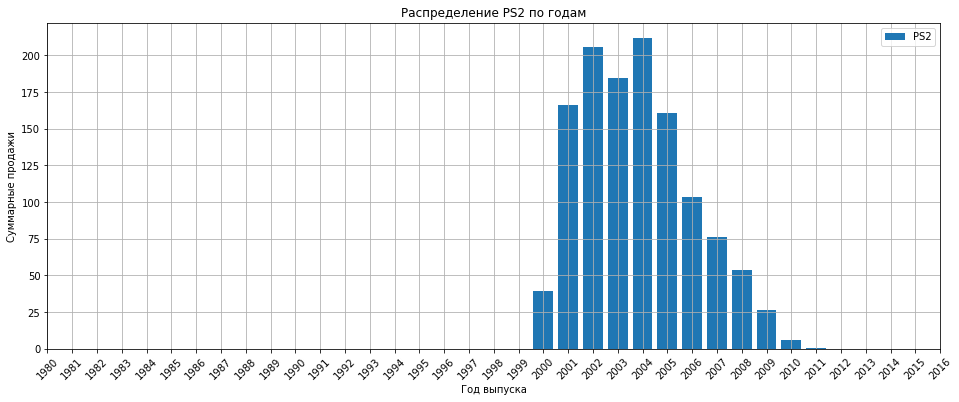

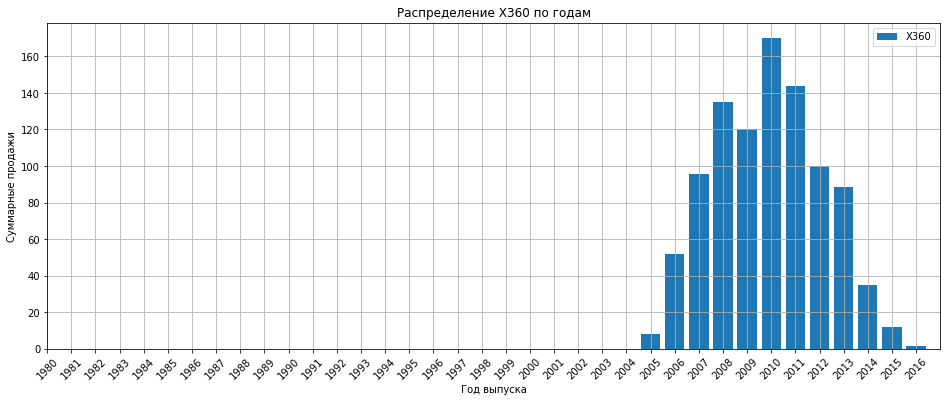

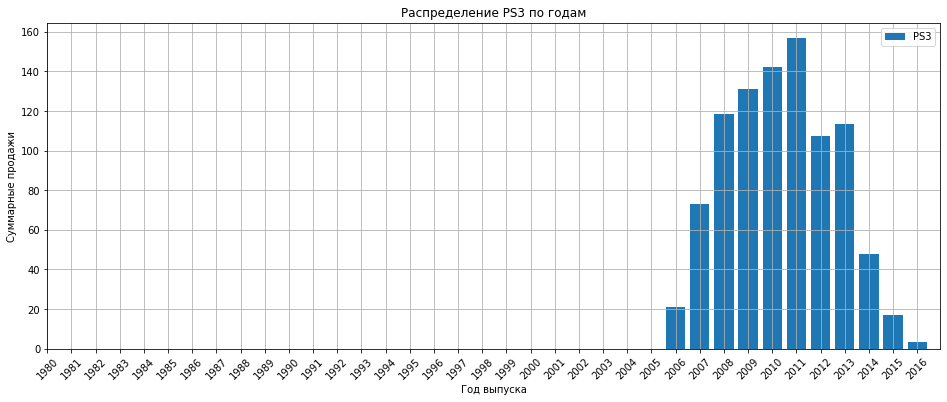

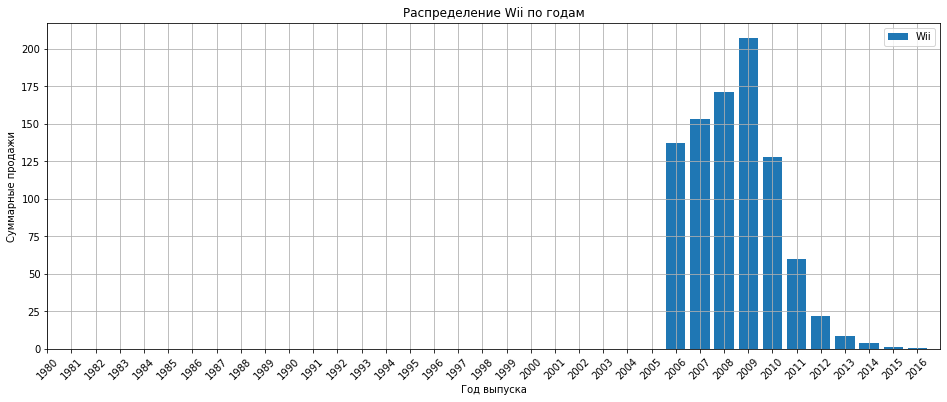

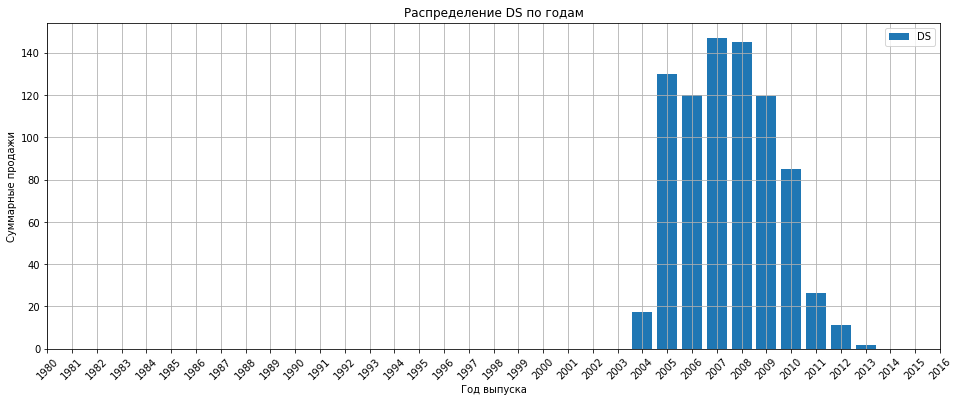

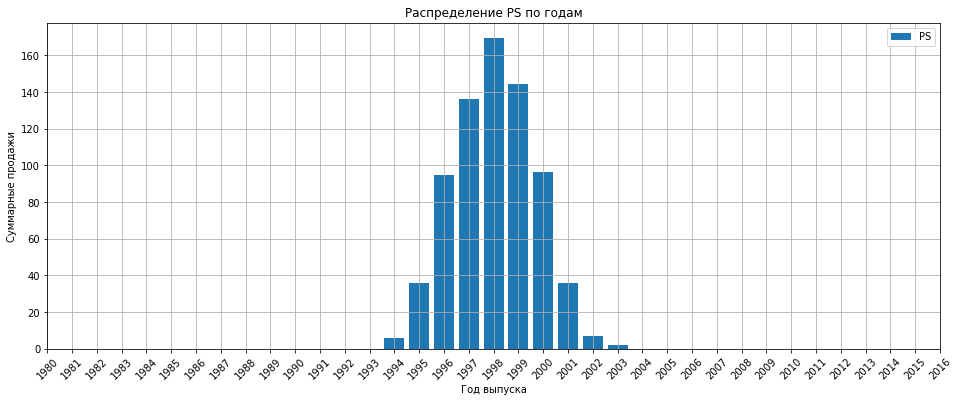

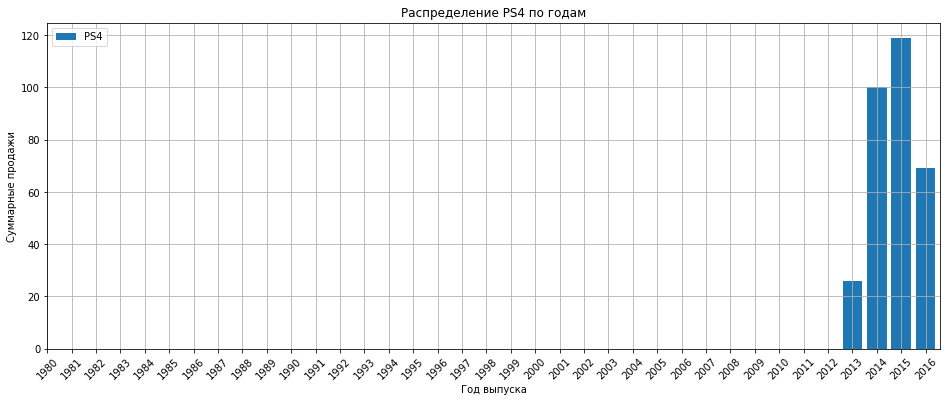

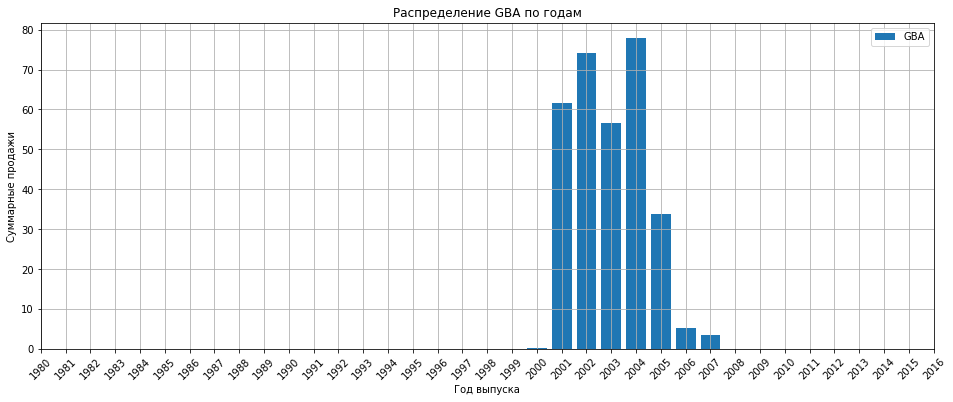

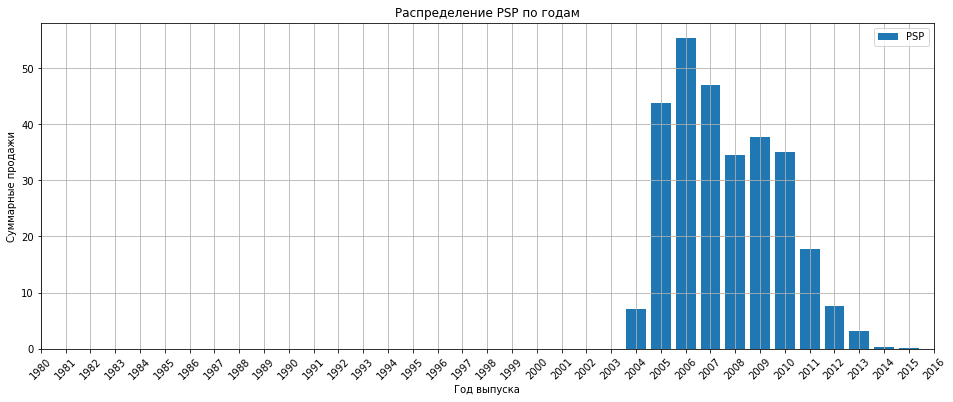

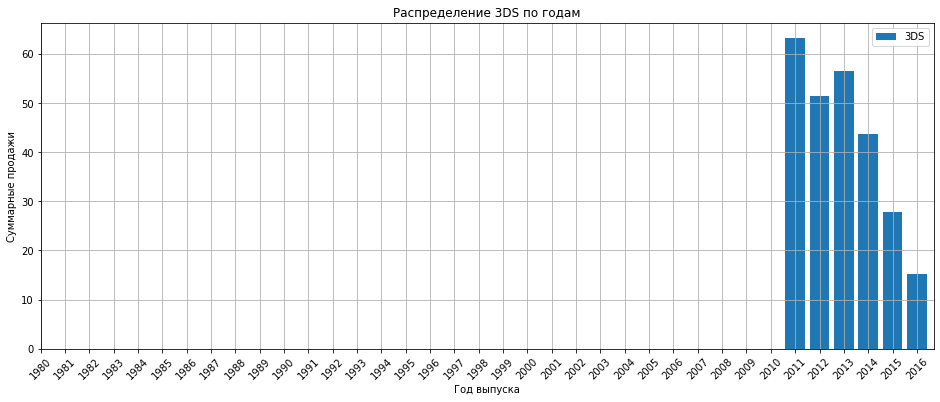

In [103]:
# Группирую таблицу для построения распределений по годам
top_platforms_grouped = top_platforms.groupby(['platform','year_of_release'])[['sales_total']].sum().reset_index()

# В цикле составляем распределения для каждой платформы
for element in top_platforms_list:
    data_spare = top_platforms_grouped[top_platforms_grouped['platform'] == element]   
    plt.figure(figsize=(16,6))
    plt.bar(data_spare['year_of_release'], data_spare['sales_total'], label = element)
    plt.xrot=45
    plt.legend()
    plt.grid()
    plt.title(f'Распределение {element} по годам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.xticks(np.linspace(1980,2016,37),rotation=45)
    plt.show()

Срок "жизни" платформы укладывается примерно в 10 лет, причём в большинстве случаев распределение похоже на нормальное с пиком популярности на 4..5-м году жизни. Отдельно выделяется PS4, т.к. это сравнительно молодая консоль, а также ПК: как игровая платформа, ПК популярен в той или иной степени уже 15 лет. Предположительно, потому что это универсальное устройство, используемое не только для игр, и здесь действуют иные закономерности, отличные от присущих сугубо игровым девайсам.

#### Оценка актуального периода

Учитывая примерный срок жизни платформы около 10 лет, считаю актуальным период, не превышающий 10 лет от целевого года. Соответственно, отберём в набор data_act (actual) данные от 2007 года и новее.

In [104]:
data_act = data.query('year_of_release > 2007')
data_act.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80


По новой актуальной выборке посмотрим на распределение продаж платформ по годам. Определим лидеров, растущих и падающих. Для сравнения платформ друг с другом разместим их суммарные продажи по годам на одном распределении.

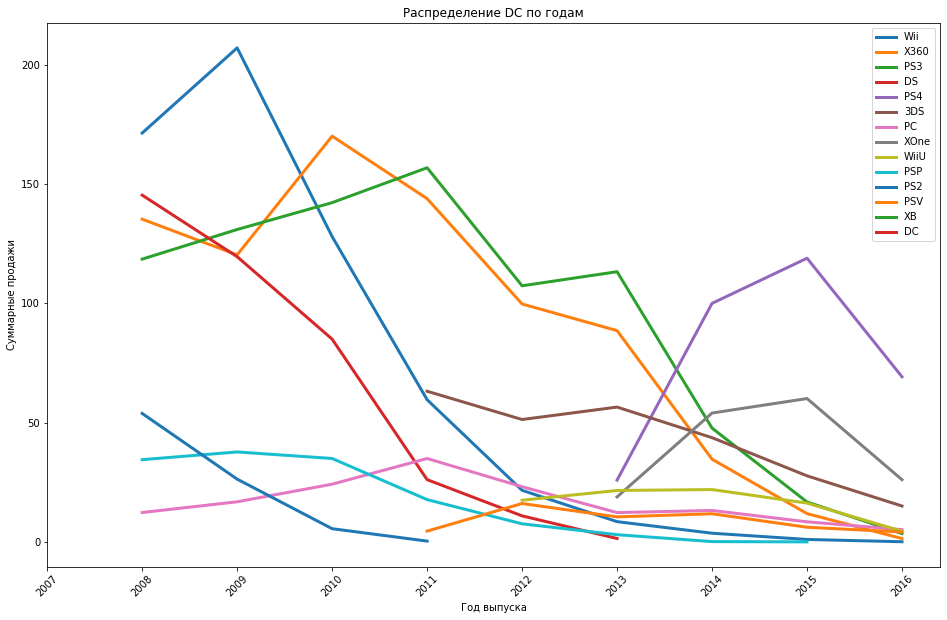

In [105]:
# Группирую таблицу для построения распределений по годам
sales = data_act.groupby(['platform','year_of_release'])[['sales_total']].sum().reset_index()
sales_list = data_act['platform'].unique()

# В цикле составляем распределения для каждой платформы
plt.figure(figsize=(16,10))
plt.title(f'Распределение платформ по годам')

for element in sales_list:
    data_spare = sales[sales['platform'] == element]       
    plt.plot(data_spare['year_of_release'], data_spare['sales_total'], label = element, linewidth=3.0)
    plt.xrot=45
    plt.legend()
    plt.title(f'Распределение {element} по годам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.xticks(np.linspace(2007,2016,10),rotation=45)
plt.show()

По распределению можем сделать следующие выводы:
1. Примерно до 2013...2014 года лидирующими платформами были PS2, X360, PS3 и DS. К 2016 году популярность этих платформ практически дошла до нуля.
2. На момент конца 2016 года лидирующие позиции в продажах занимают PS4, 3DS и XOne. К тому же, как выяснили ранее, платформу PC следует учитывать, не смотря на её относительно низкие продажи, т.к. она всё равно остаётся актуальной в течение последних 15 лет
3. Судя по распределению, все платформы падают в продажах к концу 2016 года. Это может быть связано как с глобальной тенденцией снижения количества продаваемых игр, а может быть вызвано возможно не полными данными за 2016 год - ещё не все игры были проданы, ещё не все были учтены. Если представить, что данные за 2015 год более полные, то виден рост платформ PS4 и Xone. Также некоторая популярность сохраняется у PSV.

#### Боксплоты для платформ

Далее построим диаграммы размаха глобальных продаж по каждой платформе. Выберем для анализа платформы PS4, 3DS, XOne и PC как наиболее перспективные.

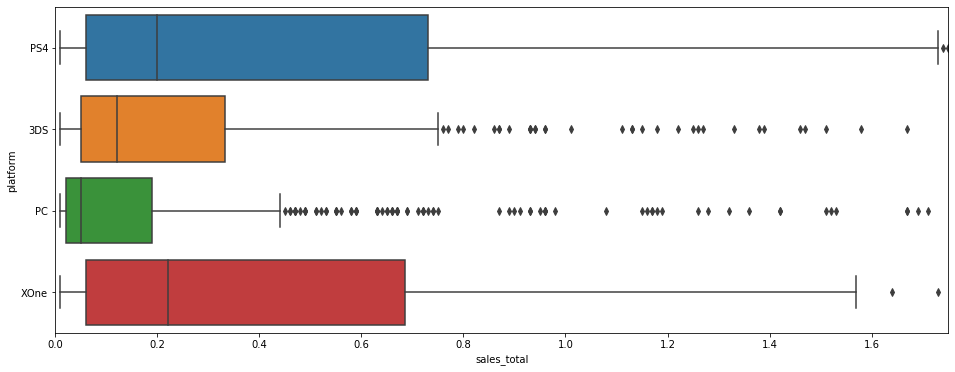

In [106]:
# Создаём список перспективных платформ
perspect_platforms = ['PS4', '3DS', 'XOne','PC']

# Делаем выборку по перспективным платформам
data_perspect = data_act.query('platform in @perspect_platforms')

# Строим боксплот из библиотеки сиборн
plt.figure(figsize=(16,6))
sns.boxplot(y="platform", x="sales_total", data=data_perspect, orient="h")
# Добавляем ограничение по оси икс, чтобы отсечь выбросы
plt.xlim(0,1.75)
plt.show()

По боксплоту видно, что PS4 и XOne - явные лидеры по продажам, у них схожая картина распределения, очень близки средние значения продаж. Продажи PC и 3DS значительно меньше, их средние тоже меньше.

#### Зависимость продаж от рейтингов

Построим диаграммы рассеяния и посчитаем корреляции продаж с рейтингами пользователей и критиков для выбранных перспективных платформ.

Диаграмма рассеяния для платформы PS4


<Figure size 648x648 with 0 Axes>

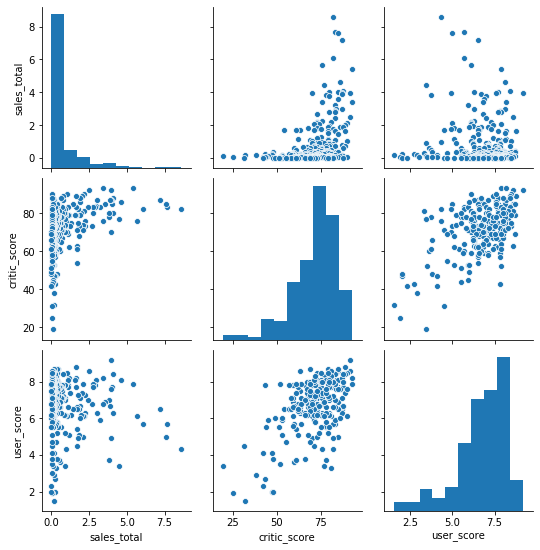

Диаграмма рассеяния для платформы 3DS


<Figure size 648x648 with 0 Axes>

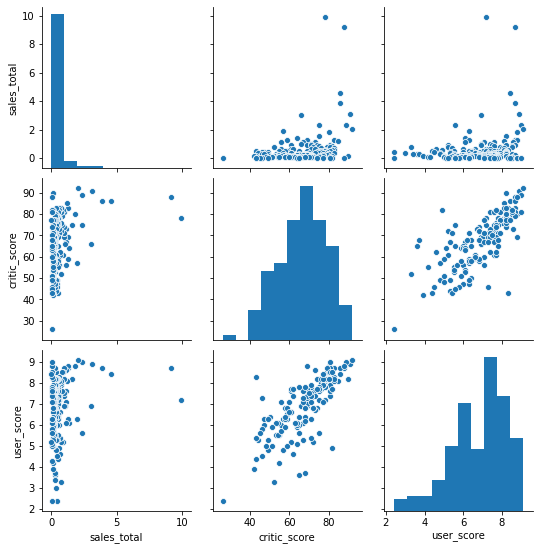

Диаграмма рассеяния для платформы XOne


<Figure size 648x648 with 0 Axes>

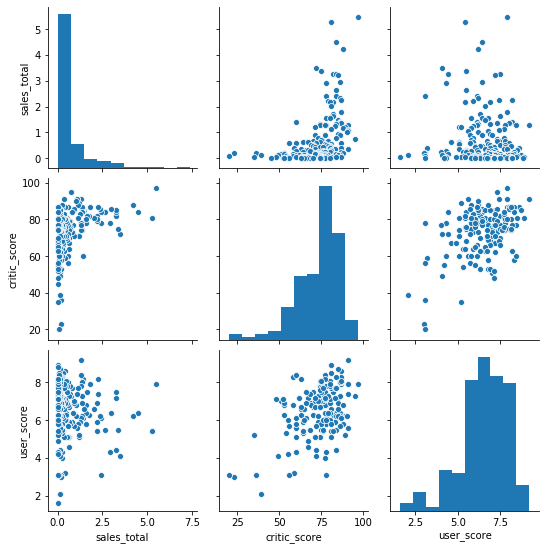

Диаграмма рассеяния для платформы PC


<Figure size 648x648 with 0 Axes>

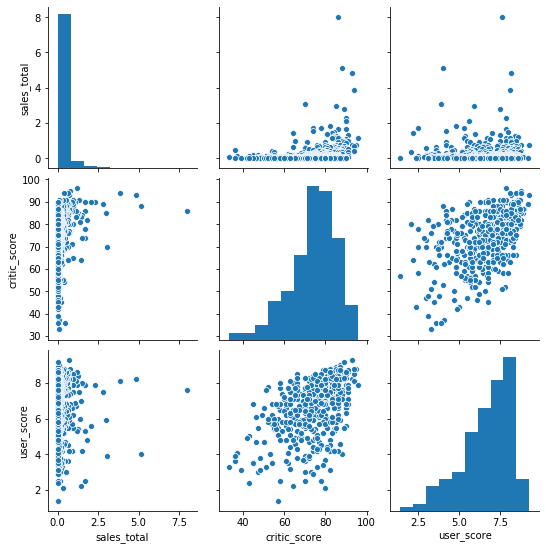

In [107]:
# В цикле построим диаграммы рассеяния для платформ из списка перспективных

for element in perspect_platforms:
    print(f'Диаграмма рассеяния для платформы {element}')
# Далее делаю ограничение по макс. общим продажам, 
# т.к. если его не сделать, рассеяния получаются слишком "узкие"
    data_scatter = (data_act.query('platform == @element & sales_total < 10')
                  [['sales_total','critic_score','user_score']])
    plt.figure(figsize=(9,9))
    sns.pairplot(data_scatter,height=2.5)
    plt.show()

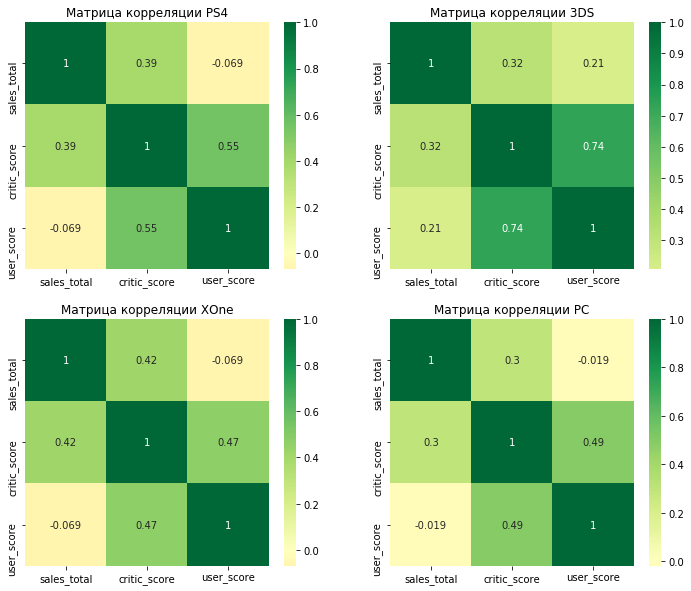

In [108]:
# Во втором цикле составим матрицы корреляции для того, чтобы они располагались рядом друг с другом

fig = plt.figure(figsize=(12, 10))
for i, element in enumerate(perspect_platforms,1):
    data_corr = (data_act.query('platform == @element & sales_total < 10')
                 [['sales_total','critic_score','user_score']])
    subplot = fig.add_subplot(2, 2, i)
    sns.heatmap(data_corr.corr(), 
                xticklabels=data_corr.corr().columns, 
                yticklabels=data_corr.corr().columns, 
                cmap='RdYlGn', 
                center=0, 
                annot=True)
    plt.title(f'Матрица корреляции {element}')
plt.show()

Для начала отдельно рассмотрим платформу PS4:
1. На диаграмме рассеяния наблюдаем слабую зависимость, что при более высоком рейтинге критиков продажи игр выше.
2. На ней же видим, что от зависимость продаж от рейтинга пользователей не прослеживается.
3. По корреляции подтверждаем - есть зависимость от рейтинга критиков и практически отсутствует - от рейтинга пользователей.

Сравним с прочими платформами:
1. В целом, картина сохраняется для всех 4 платформ.
2. В случае 3DS мнение пользователей больше влияет на продажи.
3. В случае XOne рейтинг критиков наиболее соотносится с продажами.

#### Распределение игр по жанрам

Сперва оценим в общем, какие жанры более популярны, начиная с 2007 года.

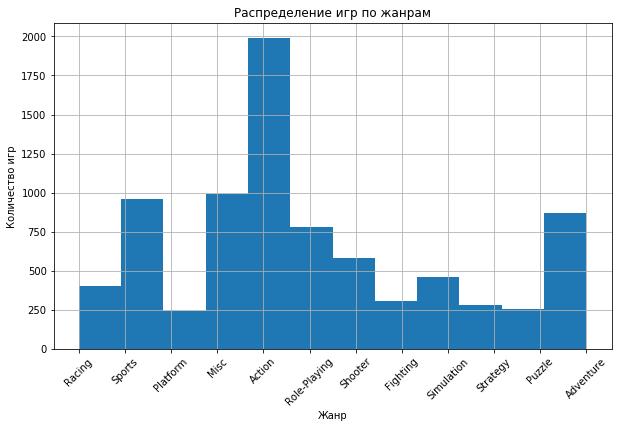

In [109]:
# Число корзин равно количеству уникальных жанров.
data_act['genre'].hist(figsize=(10,6),bins=12,xrot=45)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

Наиболее популярны игры в жанре action, sport, misc, adventure. Далее оценим продажи игр в зависимости от жанра.

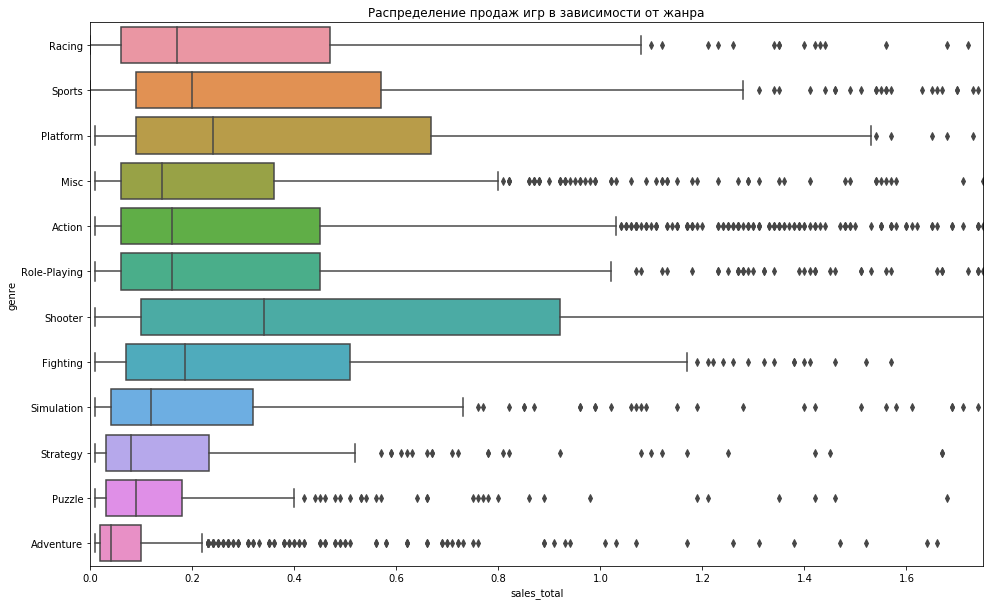

In [110]:
# Строим боксплот из библиотеки сиборн
plt.figure(figsize=(16,10))
sns.boxplot(y="genre", x="sales_total", data=data_act, orient="h")
plt.title('Распределение продаж игр в зависимости от жанра')
plt.xlim(0,1.75)
plt.show()

По распределению продаж жанров можно сделать следующие наблюдения:
1. Самый продаваемый жанр - Shooter, причём в нём есть небольшое количество игр с крайне высокими продажами.
2. Популярные жанры по количеству игр не совпадают с наиболее продаваемыми жанрами.
3. Несмотря на высокую популярность жанра Adventure по количеству игр его продажи являются самыми низкими.
4. Вторым по продаваемости жанром является Platform, хотя количество выпускаемых игр этого жанра самое небольшое относительно прочих.

### Выводы по исследовательскому анализу данных (Шагу 3).

1. Определён временной период, когда количество выпускаемых игр значительно выросло - это 1992 год.
2. Определён средний срок жизни игровой платформы - около 10 лет, кроме платформы PC. Отсюда определён актуальный для анализа период - начиная с 2007 года.
3. Выявлены наиболее перспективные платформы: PC, XOne, PS4, 3DS.
4. Изучена зависимость продаж игры от рейтинга критиков и пользователей. Уровень продаж соотносится с оценкой критиков, но практически никак не зависит от рейтинга пользователей.
5. Определены наиболее популярные жанры игр: это action, sport, misc, adventure.
6. Определены наиболее продаваемые жанры: shooter, platform, sport, racing и fighting.

### Портрет пользователя региона (Шаг 4)

#### Определим наиболее популярные платформы в каждом регионе

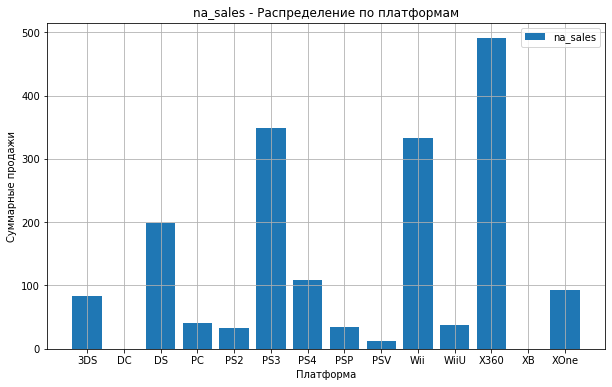

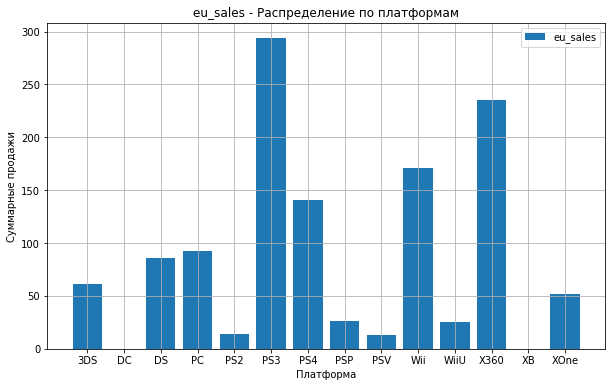

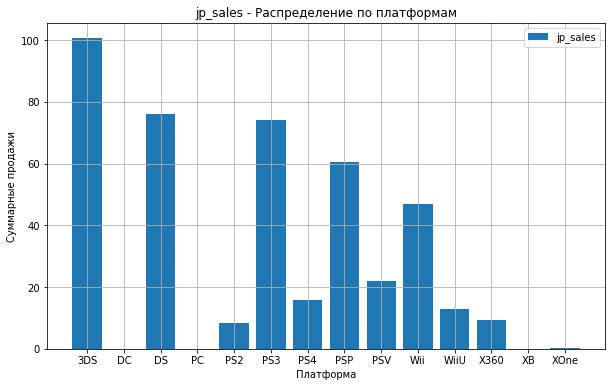

In [111]:
# Создаём список столбцов с регионами
region_list = ['na_sales','eu_sales','jp_sales']

# Создаём цикл, который будет строить гистограммы продаж по платформам в регионах
for column in region_list:
    data_region = data_act.groupby('platform')[[column]].sum().reset_index()
    plt.figure(figsize=(10,6))
    plt.bar(data_region['platform'], data_region[column], label = column)
    plt.title(f'{column} - Распределение по платформам')
    plt.xlabel('Платформа')
    plt.ylabel('Суммарные продажи')    
    plt.legend()
    plt.grid()
    plt.show()

По популярности платформ можно сделать следующие выводы:
1. В Северной Америке самая популярная платформа - X360, в Европе - PS3, в Японии - 3DS.
2. Европа и Северная Америка имеют сходные картины популярности платформ.
3. В Японии распределение заметно отличается - значительно популярны 3DS и DS, а также гораздо выше популярность PSP в сравнении с Америкой и Европой.

#### Определим наиболее популярные жанры

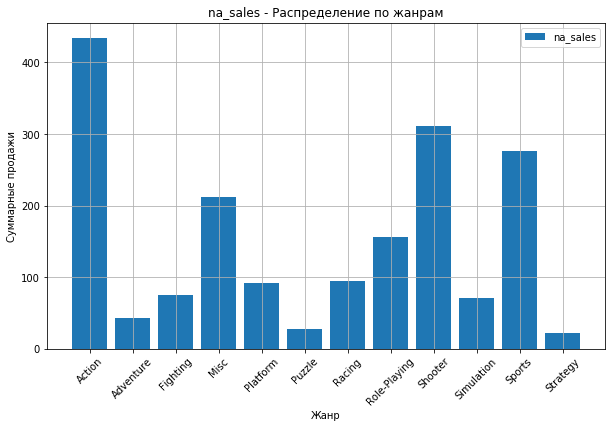

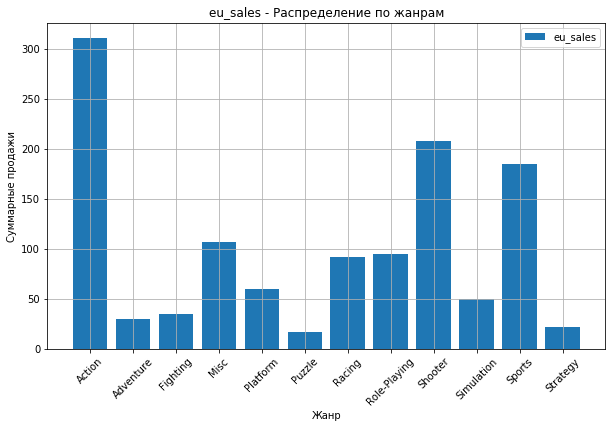

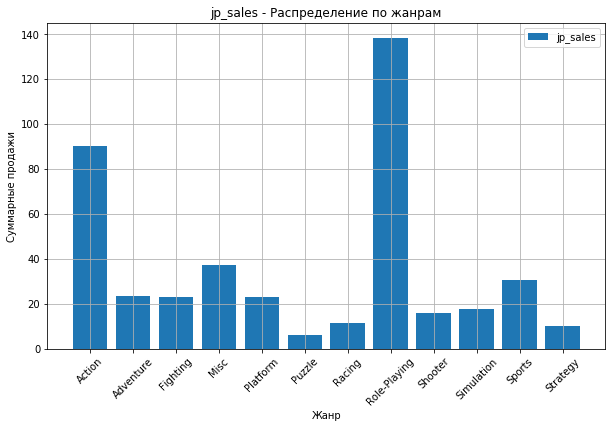

In [112]:
# Создаём цикл, который будет строить гистограммы продаж по жанрам в регионах
for column in region_list:
    data_region = data_act.groupby('genre')[[column]].sum().reset_index()
    plt.figure(figsize=(10,6))
    plt.bar(data_region['genre'], data_region[column], label = column)
    plt.title(f'{column} - Распределение по жанрам')
    plt.xlabel('Жанр')
    plt.ylabel('Суммарные продажи')    
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

По популярности жанров можно сделать следующие выводы:
1. В Северной Америке и Европе распределения по жанрам очень похожи - лидирует жанр action, далее shooter и sports.
2. В Японии распределение отличается: самый популярный жанр - Role-Playing, action на втором месте, на значительном отрыве Misc и Sports.  

#### Определим зависимость от рейтинга ESRB

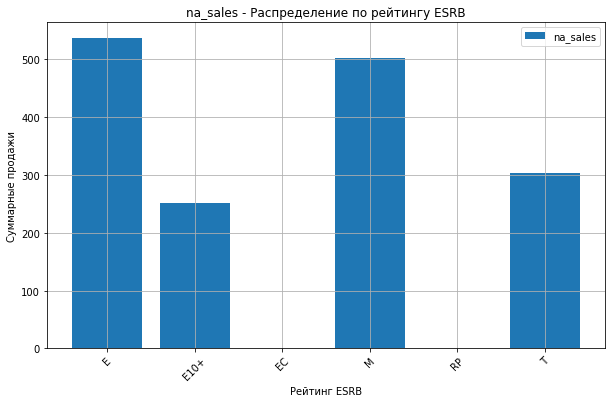

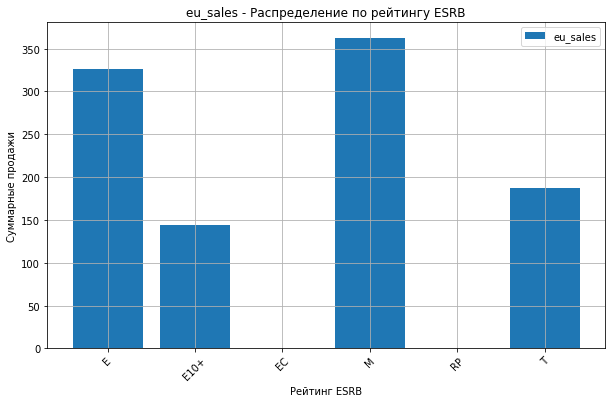

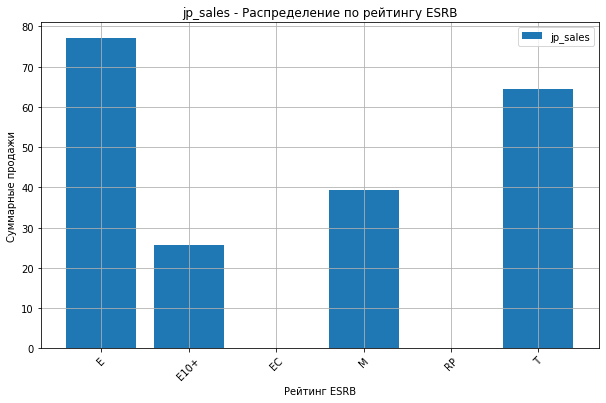

In [113]:
# Создаём цикл, который будет строить гистограммы продаж по жанрам в регионах
for column in region_list:
    data_region = data_act.groupby('rating')[[column]].sum().reset_index()
    plt.figure(figsize=(10,6))
    plt.bar(data_region['rating'], data_region[column], label = column)
    plt.title(f'{column} - Распределение по рейтингу ESRB')
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Суммарные продажи')    
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

Для справки: ESRB = Entertainment Software Rating Board. В данном случае буквы означают возрастные ограничения для игр: E - все возраста, E10+ - старше 10 лет, EC -  для детей младшего возраста, M - для взрослых, RP - рейтинг ожидается, T - для подростков.

Данных о продаж игр с рейтингом EC и RP в текущем датасете крайне мало. Проверим, сколько их всего:

In [114]:
print('Количество игр с рейтингом RP')
print(len(data_act.query('rating == "RP"')))
print()
print('Количество игр с рейтингом EC')
print(len(data_act.query('rating == "EC"')))

Количество игр с рейтингом RP
1

Количество игр с рейтингом EC
6


Такие игры в принципе есть, но они единичны. Возможно, стоит обратить внимание на релевантность этих данных.

Выводы о различиях по регионам:
1. Вновь распределения в Европе и Северной Америке похожи друг на друга, и вновь они отличаются от распределения в Японии.
2. В Северной Америке и Европе наиболее популярны игры для всех возрастов и для взрослых. Причём игры для взрослых в Европе на первом месте.
3. В Японии наиболее популярны игры для всех возрастов и для подростков. Игры для взрослых значительно менее популярны.

### Выводы о портрете пользователя региона (Шаг 4)

В целом, Северная Америка и Европа похожи по предопчтениям пользователей. Япония отличается значительно. Можно связать это с огромной разницей в Западной и Японской культурах:
1. В Северной Америке и Европе более распространены платформы PS3 и X360, в Японии - DS и DS3.
2. Жанр Action более популярен в Северной Америке и Европе, в Японии - role-playing.
3. В Японии менее распростренны игры для взрослых.

### Проверка гипотез (Шаг 5)

#### Рейтинг пользователей
Проверим гипотезу о равенстве средних пользовательских рейтингах для XOne и PC. Для этого построим их распределения и боксплот, посчитаем дисперсии, выведем гипотезу и проверим её.

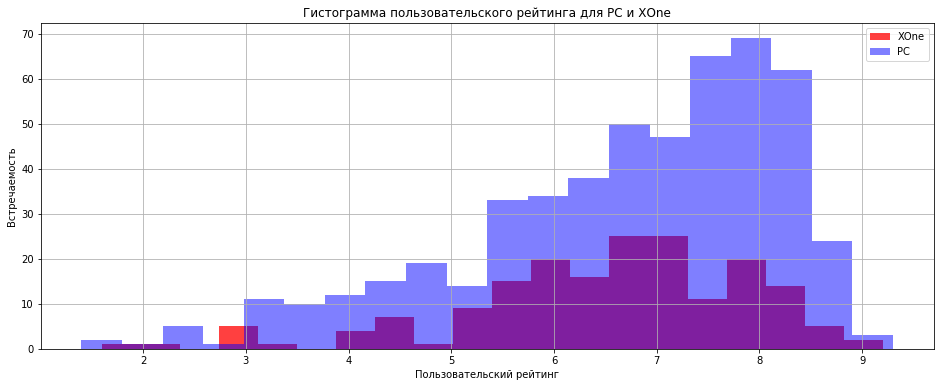

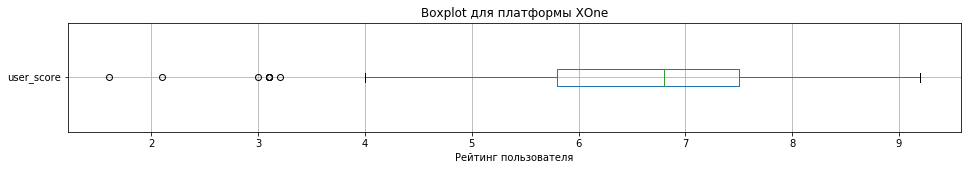

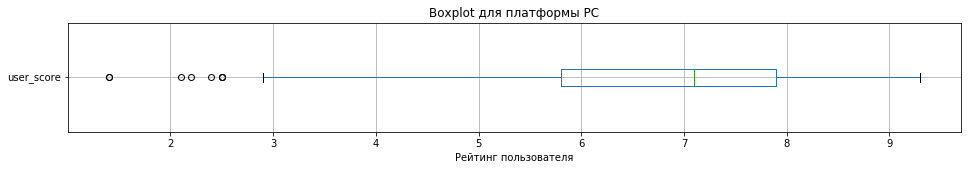

In [115]:
# Сделаем выборки по интересующим платформам

data_xone = data_act.query('platform == "XOne"')
data_pc = data_act.query('platform == "PC"')

data_xone['user_score'].hist(alpha=0.75, figsize=(16,6), label='XOne', bins=20, color='r')
data_pc['user_score'].hist(alpha=0.5, figsize=(16,6), label='PC', bins=20, color='b')
plt.legend()
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Встречаемость')
plt.title('Гистограмма пользовательского рейтинга для PC и XOne')
plt.show()

# Строим боксплоты.
data_xone.boxplot(column='user_score',vert=False,figsize=(16,2))
plt.title('Boxplot для платформы XOne')
plt.xlabel('Рейтинг пользователя')
plt.show()

data_pc.boxplot(column='user_score',vert=False,figsize=(16,2))
plt.title('Boxplot для платформы PC')
plt.xlabel('Рейтинг пользователя')
plt.show()

Характер распределения в обоих случах схожий.

In [116]:
# Оценим дисперсии для проверки гипотезы:
data_xone_score = data_xone['user_score']
data_pc_score = data_pc['user_score']

xone_variance = np.var(data_xone_score)
pc_variance = np.var(data_pc_score)
print(f'Дисперсия рейтинга по XOne равна {round(xone_variance,2)}')
print(f'Дисперсия рейтинга по PC равна {round(pc_variance,2)}')

Дисперсия рейтинга по XOne равна 1.9
Дисперсия рейтинга по PC равна 2.36


Формулируем нулевую гипотезу: средние пользовательские рейтинги на обоих платформах равны.

In [117]:
alpha = 0.05 

results = st.ttest_ind(
    data_xone_score, 
    data_pc_score, 
#     Здесь дисперсии близки, поэтому:
    equal_var = True,
#     Вводим условие по игнорированию пропущенных значений
    nan_policy='omit')

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.12954586110614363
Не получилось отвергнуть нулевую гипотезу


Гипотезу не отвергли. Таким образом, считаем пользовательские рейтинги PC и XOne равными.

#### Рейтинг пользователей

Проверим гипотезу о неравенстве средних пользовательски рейтингов в жанрах Action и Sports аналогичным образом.

In [118]:
data_act['genre'].unique()

array(['Racing', 'Sports', 'Platform', 'Misc', 'Action', 'Role-Playing',
       'Shooter', 'Fighting', 'Simulation', 'Strategy', 'Puzzle',
       'Adventure'], dtype=object)

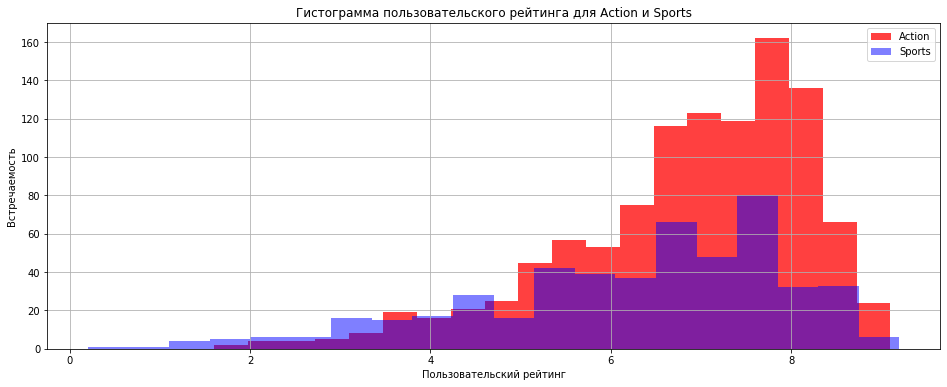

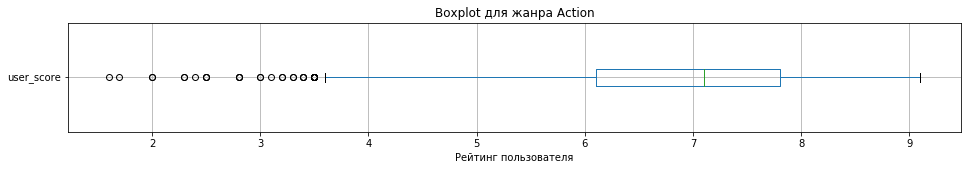

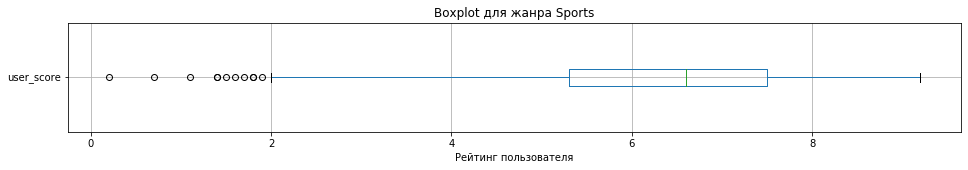

In [119]:
# Сделаем выборки по интересующим платформам

data_action = data_act.query('genre == "Action"')
data_sports = data_act.query('genre == "Sports"')

data_action['user_score'].hist(alpha=0.75, figsize=(16,6), label='Action', bins=20, color='r')
data_sports['user_score'].hist(alpha=0.5, figsize=(16,6), label='Sports', bins=20, color='b')
plt.legend()
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Встречаемость')
plt.title('Гистограмма пользовательского рейтинга для Action и Sports')
plt.show()

# Строим боксплоты.
data_action.boxplot(column='user_score',vert=False,figsize=(16,2))
plt.title('Boxplot для жанра Action')
plt.xlabel('Рейтинг пользователя')
plt.show()

data_sports.boxplot(column='user_score',vert=False,figsize=(16,2))
plt.title('Boxplot для жанра Sports')
plt.xlabel('Рейтинг пользователя')
plt.show()

Характер распределения в обоих случах так же схожий.

In [120]:
# Оценим дисперсии для проверки гипотезы:
data_action_score = data_action['user_score']
data_sports_score = data_sports['user_score']

action_variance = np.var(data_action_score)
sports_variance = np.var(data_sports_score)
print(f'Дисперсия рейтинга по Action равна {round(action_variance,2)}')
print(f'Дисперсия рейтинга по Sports равна {round(sports_variance,2)}')

Дисперсия рейтинга по Action равна 1.8
Дисперсия рейтинга по Sports равна 2.92


Формулируем нулевую гипотезу: средние пользовательские рейтинги для обоих жанров равны.

In [121]:
alpha = 0.05 

results = st.ttest_ind(
    data_action_score, 
    data_sports_score, 
#     Здесь дисперсии различаются, поэтому:
    equal_var = False, 
#     Вводим условие по игнорированию пропущенных значений
    nan_policy='omit')

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.910932152134648e-13
Отвергаем нулевую гипотезу


Гипотеза о равенстве рейтингов не подтвердилась. Таким образом, не отвергается гипотеза о различии рейтингом, то есть можем предположить, что рейтинги Action и Sports действительно различаются.

### Вывод по проверке гипотез (Шагу 5)

1. Гипотеза о равенстве средних пользовательских рейтингов для платформ XOne и PC подтверждена.
2. Гипотеза о различии средних пользовательских рейтингов для жанров Actions и Sports подтверждена.

### Общий вывод (Шаг 6)

Согласно заданию необходимо было выявить закономерности, определяющие успешность игры. Эти данные получены, нужные закономерности выявлены и могут быть предоставлены заказчику к изучению. Можно дать некоторые простые рекомендации уже сейчас:
1. Наиболее "живые" и перспективные платформы - PS4, XOne, 3DS. Также стоит учитывать платформу PC.
2. Стоит обращать внимание на рейтинг критиков - он коррелирует с продажами игры.
3. Наиболее беспроигрышный жанр - Action.
4. Стоит учитывать специфику региона - предпочтения японцев значительно отличаются от Западного мира. У них популярнее платформы 3DS и DS, а также игры жанра role-playing.
5. В Западном секторе игры для взрослых не менее популярны, чем игры для всех возрастов.